![alt text](bayes.png "bayes")

In [ ]:
# think bayes, pymc (3)

In [7]:
from thinkbayes import Pmf, Suite

class Monty(Pmf):
    """Map from string location of car to probability"""

    def __init__(self, hypos):
        """Initialize the distribution.

        hypos: sequence of hypotheses
        """
        Pmf.__init__(self)
        for hypo in hypos:
            self.Set(hypo, 1)
        self.Normalize()
        
    def Likelihood(self, data, hypo):
        if hypo == data:
            return 0
        elif hypo == 'A':
            return 0.5
        else:
            return 1
        
    def Update(self, data):
        """Updates each hypothesis based on the data.

        data: any representation of the data
        """
        for hypo in self.Values():
            like = self.Likelihood(data, hypo)
            self.Mult(hypo, like)
        self.Normalize()
        

In [9]:
hypos = 'ABC'
pmf = Monty(hypos)

In [4]:
for hypo, prob in sorted(pmf.Items()):
    print(hypo, prob)

A 0.3333333333333333
B 0.3333333333333333
C 0.3333333333333333


In [10]:
data = 'B'
pmf.Update(data)

for hypo, prob in sorted(pmf.Items()):
    print(hypo, prob)

A 0.3333333333333333
B 0.0
C 0.6666666666666666


In [11]:

class Dice(Suite):
    """Represents hypotheses about which die was rolled."""

    def Likelihood(self, data, hypo):
        # hypo is 4,6,8,12,20
        if data>hypo:
            return 0
        else:
            return 1.0/hypo
        
            
        

In [12]:
suite = Dice([4, 6, 8, 12, 20])

In [13]:
suite.Print()

(4, 0.2)
(6, 0.2)
(8, 0.2)
(12, 0.2)
(20, 0.2)


In [14]:
suite.Update(6)

0.08499999999999999

In [15]:
suite.Print()

(4, 0.0)
(6, 0.3921568627450981)
(8, 0.29411764705882354)
(12, 0.19607843137254904)
(20, 0.11764705882352944)


In [16]:
suite.Update(8)
suite.Update(7)



0.10597876269621423

In [17]:
suite.Print()

(4, 0.0)
(6, 0.0)
(8, 0.7351339577434111)
(12, 0.2178174689610107)
(20, 0.04704857329557833)


In [18]:
suite.Update(8)
suite.Update(8)
suite.Update(8)
suite.Update(8)
suite.Update(8)

0.12258383829412561

In [19]:
suite.Print()

(4, 0.0)
(6, 0.0)
(8, 0.9618401442621232)
(12, 0.03752950418093332)
(20, 0.0006303515569436256)


In [34]:
probs = {4:1.0,6:1.0,8:1.0,12:1.0,20:1.0}

def normalizar(probs):
    total = sum([v for (k,v) in probs.items()])
    return {k:v/total  for (k,v) in probs.items()}


In [35]:
normalizar(probs)

{4: 0.2, 6: 0.2, 8: 0.2, 12: 0.2, 20: 0.2}

In [36]:
def likelihood(data, hypo):
    if data>hypo:
        return 0
    else:
        return 1.0/hypo

In [37]:
def update(probs, data, hypos):
    for hypo in hypos:
        lhood = likelihood(data, hypo)
        prior = probs[hypo]
        posterior = lhood * prior
        probs[hypo] = posterior
    return normalizar(probs)

In [38]:
update(probs, 5,  probs.keys())

{4: 0.0,
 6: 0.3921568627450981,
 8: 0.2941176470588236,
 12: 0.19607843137254904,
 20: 0.11764705882352944}

In [39]:
update(probs, 9,  probs.keys())

{4: 0.0, 6: 0.0, 8: 0.0, 12: 0.7352941176470588, 20: 0.26470588235294124}

In [40]:
update(probs, 9,  probs.keys())

{4: 0.0, 6: 0.0, 8: 0.0, 12: 0.8223684210526315, 20: 0.17763157894736847}

In [41]:
update(probs, 9,  probs.keys())

{4: 0.0, 6: 0.0, 8: 0.0, 12: 0.8852691218130311, 20: 0.11473087818696888}

In [42]:
update(probs, 9,  probs.keys())

{4: 0.0, 6: 0.0, 8: 0.0, 12: 0.9278503562945368, 20: 0.07214964370546323}

In [43]:
update(probs, 9,  probs.keys())

{4: 0.0, 6: 0.0, 8: 0.0, 12: 0.9554237495413965, 20: 0.044576250458603424}

In [44]:
update(probs, 9,  probs.keys())

{4: 0.0, 6: 0.0, 8: 0.0, 12: 0.9727687020619584, 20: 0.02723129793804166}

In [45]:
 # A railroad numbers its locomotives in order 1..N. 
 # One day you see a locomotive with the number 60. Estimate how many locomotives the railroad has.

In [55]:
MAX_N = 300
hypos = list(range(1,MAX_N + 1))
probs = {hypo:1/MAX_N for hypo in hypos}
probs

{1: 0.0033333333333333335,
 2: 0.0033333333333333335,
 3: 0.0033333333333333335,
 4: 0.0033333333333333335,
 5: 0.0033333333333333335,
 6: 0.0033333333333333335,
 7: 0.0033333333333333335,
 8: 0.0033333333333333335,
 9: 0.0033333333333333335,
 10: 0.0033333333333333335,
 11: 0.0033333333333333335,
 12: 0.0033333333333333335,
 13: 0.0033333333333333335,
 14: 0.0033333333333333335,
 15: 0.0033333333333333335,
 16: 0.0033333333333333335,
 17: 0.0033333333333333335,
 18: 0.0033333333333333335,
 19: 0.0033333333333333335,
 20: 0.0033333333333333335,
 21: 0.0033333333333333335,
 22: 0.0033333333333333335,
 23: 0.0033333333333333335,
 24: 0.0033333333333333335,
 25: 0.0033333333333333335,
 26: 0.0033333333333333335,
 27: 0.0033333333333333335,
 28: 0.0033333333333333335,
 29: 0.0033333333333333335,
 30: 0.0033333333333333335,
 31: 0.0033333333333333335,
 32: 0.0033333333333333335,
 33: 0.0033333333333333335,
 34: 0.0033333333333333335,
 35: 0.0033333333333333335,
 36: 0.0033333333333333335,
 

In [56]:
def likelihood(data, hypo):
    # data=60, si la hypo=70 -> P(70) ?
    if hypo>=data:
        return 1/hypo
    else:
        return 0

In [57]:
update(probs, 60,  probs.keys())

{1: 0.0,
 2: 0.0,
 3: 0.0,
 4: 0.0,
 5: 0.0,
 6: 0.0,
 7: 0.0,
 8: 0.0,
 9: 0.0,
 10: 0.0,
 11: 0.0,
 12: 0.0,
 13: 0.0,
 14: 0.0,
 15: 0.0,
 16: 0.0,
 17: 0.0,
 18: 0.0,
 19: 0.0,
 20: 0.0,
 21: 0.0,
 22: 0.0,
 23: 0.0,
 24: 0.0,
 25: 0.0,
 26: 0.0,
 27: 0.0,
 28: 0.0,
 29: 0.0,
 30: 0.0,
 31: 0.0,
 32: 0.0,
 33: 0.0,
 34: 0.0,
 35: 0.0,
 36: 0.0,
 37: 0.0,
 38: 0.0,
 39: 0.0,
 40: 0.0,
 41: 0.0,
 42: 0.0,
 43: 0.0,
 44: 0.0,
 45: 0.0,
 46: 0.0,
 47: 0.0,
 48: 0.0,
 49: 0.0,
 50: 0.0,
 51: 0.0,
 52: 0.0,
 53: 0.0,
 54: 0.0,
 55: 0.0,
 56: 0.0,
 57: 0.0,
 58: 0.0,
 59: 0.0,
 60: 0.010291495490754789,
 61: 0.010122782449922743,
 62: 0.00995951176524657,
 63: 0.009801424276909323,
 64: 0.009648277022582615,
 65: 0.00949984199146596,
 66: 0.009355904991595262,
 67: 0.009216264618586378,
 68: 0.009080731315371873,
 69: 0.008949126513699817,
 70: 0.00882128184921839,
 71: 0.008697038442891372,
 72: 0.008576246242295657,
 73: 0.00845876341705873,
 74: 0.008344455803314695,
 75: 0.00823319639

<AxesSubplot:>

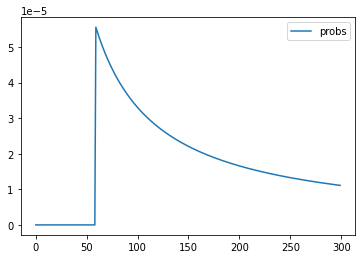

In [59]:
import pandas as pd
pd.DataFrame({'probs':probs.values()}).plot()

In [60]:
update(probs, 87,  probs.keys())

{1: 0.0,
 2: 0.0,
 3: 0.0,
 4: 0.0,
 5: 0.0,
 6: 0.0,
 7: 0.0,
 8: 0.0,
 9: 0.0,
 10: 0.0,
 11: 0.0,
 12: 0.0,
 13: 0.0,
 14: 0.0,
 15: 0.0,
 16: 0.0,
 17: 0.0,
 18: 0.0,
 19: 0.0,
 20: 0.0,
 21: 0.0,
 22: 0.0,
 23: 0.0,
 24: 0.0,
 25: 0.0,
 26: 0.0,
 27: 0.0,
 28: 0.0,
 29: 0.0,
 30: 0.0,
 31: 0.0,
 32: 0.0,
 33: 0.0,
 34: 0.0,
 35: 0.0,
 36: 0.0,
 37: 0.0,
 38: 0.0,
 39: 0.0,
 40: 0.0,
 41: 0.0,
 42: 0.0,
 43: 0.0,
 44: 0.0,
 45: 0.0,
 46: 0.0,
 47: 0.0,
 48: 0.0,
 49: 0.0,
 50: 0.0,
 51: 0.0,
 52: 0.0,
 53: 0.0,
 54: 0.0,
 55: 0.0,
 56: 0.0,
 57: 0.0,
 58: 0.0,
 59: 0.0,
 60: 0.0,
 61: 0.0,
 62: 0.0,
 63: 0.0,
 64: 0.0,
 65: 0.0,
 66: 0.0,
 67: 0.0,
 68: 0.0,
 69: 0.0,
 70: 0.0,
 71: 0.0,
 72: 0.0,
 73: 0.0,
 74: 0.0,
 75: 0.0,
 76: 0.0,
 77: 0.0,
 78: 0.0,
 79: 0.0,
 80: 0.0,
 81: 0.0,
 82: 0.0,
 83: 0.0,
 84: 0.0,
 85: 0.0,
 86: 0.0,
 87: 0.016047779004652145,
 88: 0.01568512904005838,
 89: 0.0153346344257306,
 90: 0.014995757936569395,
 91: 0.014667991702235492,
 92: 0.0143508553

<AxesSubplot:>

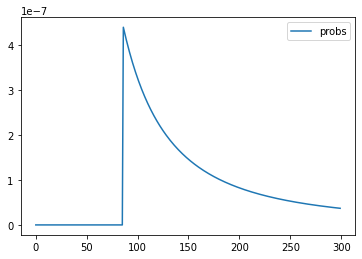

In [61]:
pd.DataFrame({'probs':probs.values()}).plot()

In [62]:
update(probs, 50,  probs.keys())

{1: 0.0,
 2: 0.0,
 3: 0.0,
 4: 0.0,
 5: 0.0,
 6: 0.0,
 7: 0.0,
 8: 0.0,
 9: 0.0,
 10: 0.0,
 11: 0.0,
 12: 0.0,
 13: 0.0,
 14: 0.0,
 15: 0.0,
 16: 0.0,
 17: 0.0,
 18: 0.0,
 19: 0.0,
 20: 0.0,
 21: 0.0,
 22: 0.0,
 23: 0.0,
 24: 0.0,
 25: 0.0,
 26: 0.0,
 27: 0.0,
 28: 0.0,
 29: 0.0,
 30: 0.0,
 31: 0.0,
 32: 0.0,
 33: 0.0,
 34: 0.0,
 35: 0.0,
 36: 0.0,
 37: 0.0,
 38: 0.0,
 39: 0.0,
 40: 0.0,
 41: 0.0,
 42: 0.0,
 43: 0.0,
 44: 0.0,
 45: 0.0,
 46: 0.0,
 47: 0.0,
 48: 0.0,
 49: 0.0,
 50: 0.0,
 51: 0.0,
 52: 0.0,
 53: 0.0,
 54: 0.0,
 55: 0.0,
 56: 0.0,
 57: 0.0,
 58: 0.0,
 59: 0.0,
 60: 0.0,
 61: 0.0,
 62: 0.0,
 63: 0.0,
 64: 0.0,
 65: 0.0,
 66: 0.0,
 67: 0.0,
 68: 0.0,
 69: 0.0,
 70: 0.0,
 71: 0.0,
 72: 0.0,
 73: 0.0,
 74: 0.0,
 75: 0.0,
 76: 0.0,
 77: 0.0,
 78: 0.0,
 79: 0.0,
 80: 0.0,
 81: 0.0,
 82: 0.0,
 83: 0.0,
 84: 0.0,
 85: 0.0,
 86: 0.0,
 87: 0.024779034439327653,
 88: 0.023943857583878108,
 89: 0.02314579579442582,
 90: 0.022382810034843048,
 91: 0.02165299423067048,
 92: 0.020954565

<AxesSubplot:>

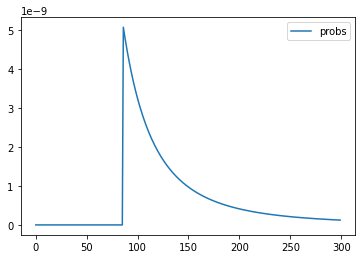

In [63]:
pd.DataFrame({'probs':probs.values()}).plot()

In [64]:
from scipy.stats import norm

In [66]:
norm.pdf(400, loc=500, scale=100)

0.0024197072451914337

In [67]:
norm.pdf(500, loc=500, scale=100)

0.003989422804014327

In [68]:
[norm.pdf(500, loc=500, scale=100) for hypo in hypos]

[0.003989422804014327,
 0.003989422804014327,
 0.003989422804014327,
 0.003989422804014327,
 0.003989422804014327,
 0.003989422804014327,
 0.003989422804014327,
 0.003989422804014327,
 0.003989422804014327,
 0.003989422804014327,
 0.003989422804014327,
 0.003989422804014327,
 0.003989422804014327,
 0.003989422804014327,
 0.003989422804014327,
 0.003989422804014327,
 0.003989422804014327,
 0.003989422804014327,
 0.003989422804014327,
 0.003989422804014327,
 0.003989422804014327,
 0.003989422804014327,
 0.003989422804014327,
 0.003989422804014327,
 0.003989422804014327,
 0.003989422804014327,
 0.003989422804014327,
 0.003989422804014327,
 0.003989422804014327,
 0.003989422804014327,
 0.003989422804014327,
 0.003989422804014327,
 0.003989422804014327,
 0.003989422804014327,
 0.003989422804014327,
 0.003989422804014327,
 0.003989422804014327,
 0.003989422804014327,
 0.003989422804014327,
 0.003989422804014327,
 0.003989422804014327,
 0.003989422804014327,
 0.003989422804014327,
 0.00398942